# Imporving Traffic Management Systems

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Traffic Around the world.csv')

## Data Preprocessing

In [3]:
dataset.head()

,Rank,City,AverageTCI,MaxTCI
0,1,Lagos,60.16,130.21
1,2,Riga,47.12,87.51
2,3,Mumbai,38.37,153.41
3,4,Tehran,38.20,110.12
4,5,London,38.16,128.50


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        69 non-null     int64  
 1   City        69 non-null     object 
 2   AverageTCI  69 non-null     float64
 3   MaxTCI      69 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.3+ KB


In [5]:
# There are no Null Values in the dataset

In [6]:
# Deleting duplicate rows in the dataset
temp_l = []
for i in range(len(dataset)):
    if dataset['City'][i] not in temp_l:
        temp_l.append(dataset['City'][i])
    else:
        dataset.drop(i, axis=0, inplace=True)
del temp_l

In [7]:
dataset

,Rank,City,AverageTCI,MaxTCI
0,1,Lagos,60.16,130.21
1,2,Riga,47.12,87.51
2,3,Mumbai,38.37,153.41
3,4,Tehran,38.20,110.12
4,5,London,38.16,128.50
...,...,...,...,...
63,64,Singapore,5.23,42.93
64,65,Helsinki,4.67,22.43
65,66,Turin,4.29,46.20
66,67,Valencia,3.40,31.97


## Graphs and Visualization

In [8]:
MaxTCI_Asc = dataset.sort_values(by = "MaxTCI", ascending=True)
AvgTCI_Asc = dataset.sort_values(by = "AverageTCI", ascending=True)

In [9]:
AvgTCI_Asc

,Rank,City,AverageTCI,MaxTCI
67,68,Zaragoza,2.01,42.18
66,67,Valencia,3.40,31.97
65,66,Turin,4.29,46.20
64,65,Helsinki,4.67,22.43
63,64,Singapore,5.23,42.93
...,...,...,...,...
4,5,London,38.16,128.50
3,4,Tehran,38.20,110.12
2,3,Mumbai,38.37,153.41
1,2,Riga,47.12,87.51


Text(0, 0.5, 'Cities')

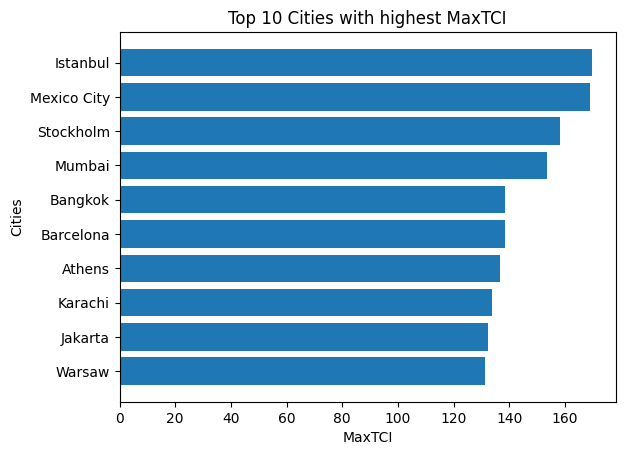

In [10]:
# Graph for cities with highest MaxTCI
plt.barh(MaxTCI_Asc['City'].tail(10),MaxTCI_Asc['MaxTCI'].tail(10))
plt.title('Top 10 Cities with highest MaxTCI')
plt.xlabel('MaxTCI')
plt.ylabel('Cities')

Text(0, 0.5, 'Cities')

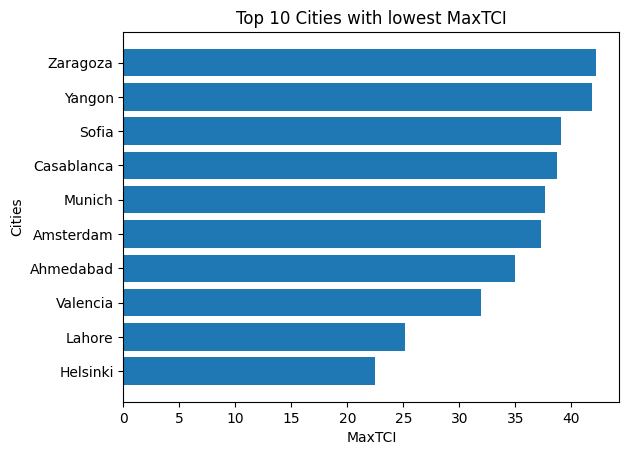

In [11]:
#Graph for Cities with lowest MaxCTI
plt.barh(MaxTCI_Asc['City'].head(10),MaxTCI_Asc['MaxTCI'].head(10))
plt.title('Top 10 Cities with lowest MaxTCI')
plt.xlabel('MaxTCI')
plt.ylabel('Cities')

Text(0, 0.5, 'Cities')

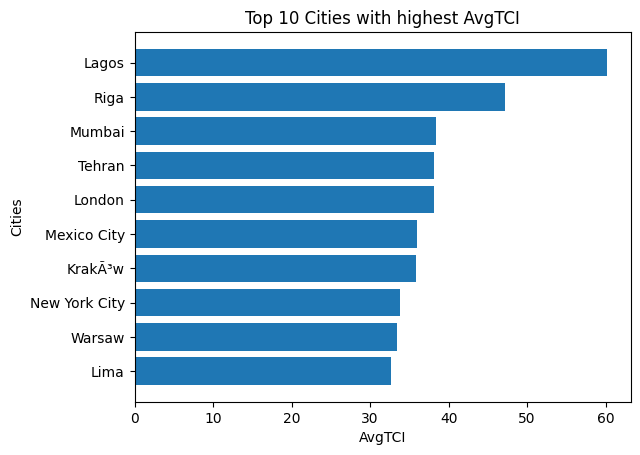

In [12]:
# Graph for cities with highest AvgTCI
plt.barh(AvgTCI_Asc['City'].tail(10),AvgTCI_Asc['AverageTCI'].tail(10))
plt.title('Top 10 Cities with highest AvgTCI')
plt.xlabel('AvgTCI')
plt.ylabel('Cities')

Text(0, 0.5, 'Cities')

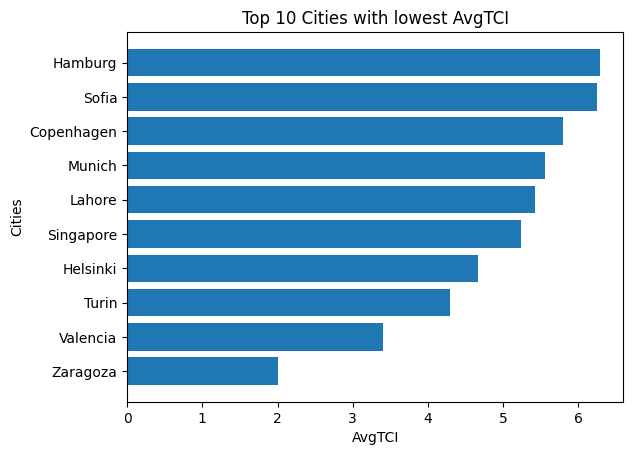

In [13]:
# Graph for cities with lowest AvgTCI
plt.barh(AvgTCI_Asc['City'].head(10),AvgTCI_Asc['AverageTCI'].head(10))
plt.title('Top 10 Cities with lowest AvgTCI')
plt.xlabel('AvgTCI')
plt.ylabel('Cities')

## Case Studies

### Finding mean city densities in highest and lowest Average TCI cities

In [14]:
# Finding population densities of cities with highest average TCI
AvgTCI_Asc['City'].tail(10).values

array(['Lima', 'Warsaw', 'New York City', 'KrakÃ³w', 'Mexico City',
       'London', 'Tehran', 'Mumbai', 'Riga', 'Lagos'], dtype=object)

In [15]:
city_names = ['Lima', 'Warsaw', 'New York City', 'Kraków', 'Mexico City', 'London', 'Tehran', 'Mumbai', 'Riga', 'Lagos']
city_populations = [10750000, 1793579, 8175133, 779115, 9209944, 8908081, 8417693, 12442373, 623449, 1400037]

# Calculate population densities
population_densities_high = [population / 1000 for population in city_populations]

city_data = pd.DataFrame({'City': city_names, 'Population': city_populations, 'Density (per sq. km)': population_densities_high})
print(city_data)

            City  Population  Density (per sq. km)
0           Lima    10750000             10750.000
1         Warsaw     1793579              1793.579
2  New York City     8175133              8175.133
3         Kraków      779115               779.115
4    Mexico City     9209944              9209.944
5         London     8908081              8908.081
6         Tehran     8417693              8417.693
7         Mumbai    12442373             12442.373
8           Riga      623449               623.449
9          Lagos     1400037              1400.037


Text(0, 0.5, 'Cities')

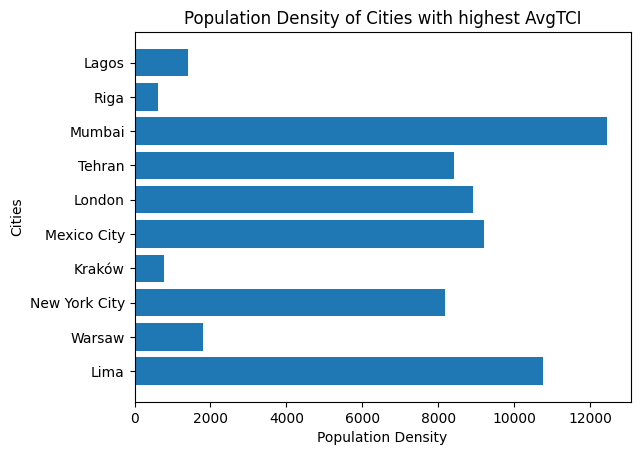

In [16]:
plt.barh(city_data['City'],city_data['Density (per sq. km)'])
plt.title('Population Density of Cities with highest AvgTCI')
plt.xlabel('Population Density')
plt.ylabel('Cities')

In [17]:
population_density_high =  np.mean(population_densities_high)
population_density_high

6249.9403999999995

In [18]:
# Finding population densities of cities with lowest average TCI
AvgTCI_Asc['City'].head(10).values

array(['Zaragoza', 'Valencia', 'Turin', 'Helsinki', 'Singapore', 'Lahore',
       'Munich', 'Copenhagen', 'Sofia', 'Hamburg'], dtype=object)

In [19]:
city_names = ['Zaragoza', 'Valencia', 'Turin', 'Helsinki', 'Singapore', 'Lahore', 'Munich', 'Copenhagen', 'Sofia', 'Hamburg']
city_populations = [700000, 794288, 885546, 648042, 5612300, 12188000, 1484226, 794128, 1242722, 1841179]

population_densities_low = [population / 1000 for population in city_populations]

city_data = pd.DataFrame({'City': city_names, 'Population': city_populations, 'Density (per sq. km)': population_densities_low})

print(city_data)

         City  Population  Density (per sq. km)
0    Zaragoza      700000               700.000
1    Valencia      794288               794.288
2       Turin      885546               885.546
3    Helsinki      648042               648.042
4   Singapore     5612300              5612.300
5      Lahore    12188000             12188.000
6      Munich     1484226              1484.226
7  Copenhagen      794128               794.128
8       Sofia     1242722              1242.722
9     Hamburg     1841179              1841.179


Text(0, 0.5, 'Cities')

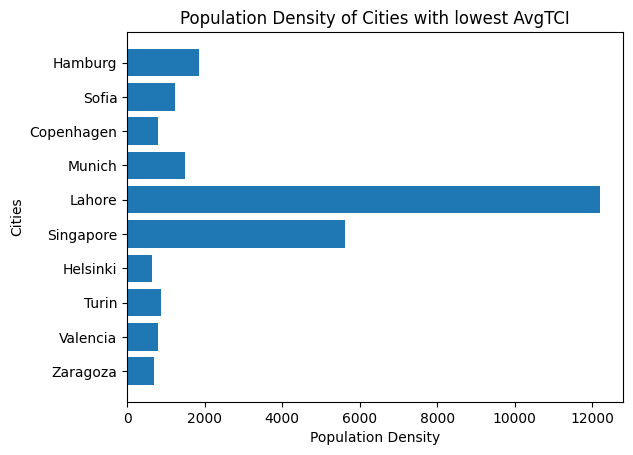

In [20]:
plt.barh(city_data['City'],city_data['Density (per sq. km)'])
plt.title('Population Density of Cities with lowest AvgTCI')
plt.xlabel('Population Density')
plt.ylabel('Cities')

In [21]:
population_density_low = np.mean(population_densities_low)
population_density_low

2619.0431

Text(0, 0.5, 'Population Density (per sq. km)')

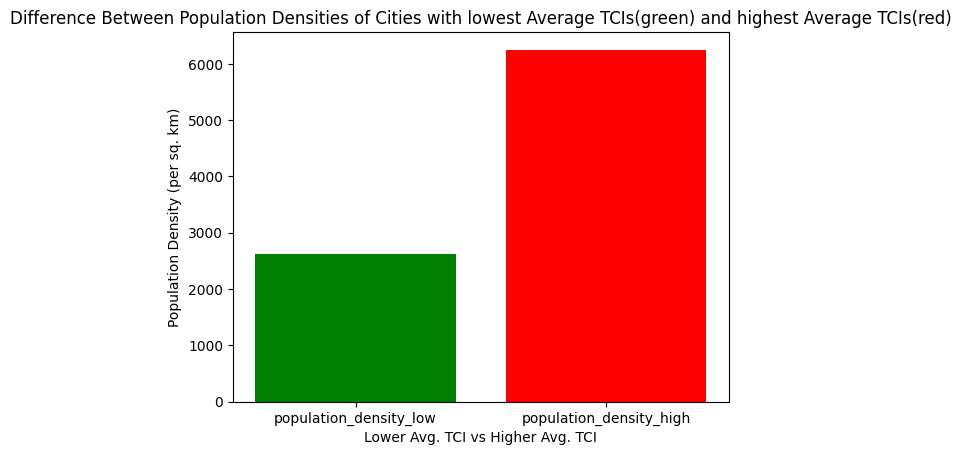

In [22]:
plt.bar(['population_density_low', 'population_density_high'], [population_density_low, population_density_high], color= ['green', 'red'])
plt.title("Difference Between Population Densities of Cities with lowest Average TCIs(green) and highest Average TCIs(red)")
plt.xlabel('Lower Avg. TCI vs Higher Avg. TCI')
plt.ylabel('Population Density (per sq. km)')

In [23]:
''' Result : You can clealy see that cities with high average TCI have high population densities, which means that large number of people 
are living there per unit area.
This is an obvious case of over population putting extra pressure on the cities infrastrcture'''

' Result : You can clealy see that cities with high average TCI have high population densities, which means that large number of people \nare living there per unit area.\nThis is an obvious case of over population putting extra pressure on the cities infrastrcture'

### Special Case Study : Lagos

In [24]:
'''
Lagos have the highest average TCI in the dataset.
Lagos is the Nigera's largest city.
Its population is 15,020,604,
and population density of 13016, which is much higher than normal.

Link - > https://www.bloomberg.com/news/articles/2023-09-05/lagos-nigeria-city-with-world-s-worst-traffic-gets-metro-after-12-year-wait

According to the bloomberg acticle mentioned above, the city of Lagos is an economic hub for Nigeria. However the cities infrastructure was not
prepared for this. All the transportation burden lies of the roads which have frequent road accidents and poor maintenance. 

Another major reason is the lack of public transportation facilities. As mentioned in the article, the city gets its first metro line after 
delays of 12 years, unfortunately the government lacks the funds to run it on its full capacity, as Nigeria is one of the poorest contries
in the world.

'''

"\nLagos have the highest average TCI in the dataset.\nLagos is the Nigera's largest city.\nIts population is 15,020,604,\nand population density of 13016, which is much higher than normal.\n\nLink - > https://www.bloomberg.com/news/articles/2023-09-05/lagos-nigeria-city-with-world-s-worst-traffic-gets-metro-after-12-year-wait\n\nAccording to the bloomberg acticle mentioned above, the city of Lagos is an economic hub for Nigeria. However the cities infrastructure was not\nprepared for this. All the transportation burden lies of the roads which have frequent road accidents and poor maintenance. \n\nAnother major reason is the lack of public transportation facilities. As mentioned in the article, the city gets its first metro line after \ndelays of 12 years, unfortunately the government lacks the funds to run it on its full capacity, as Nigeria is one of the poorest contries\nin the world.\n\n"

### Special Case Study : Mumbai

In [25]:
'''
Mumbai situated in the state of Maharashtra is the most populous city in India. It is called the economic hub of India.
It is also one of the largest and most densely populated areas in the world.

https://www.researchgate.net/publication/344400795_Study_of_traffic_Problems_solutions_in_Mumbai_City

Here is an incredible research paper from Mr. Ganesh R Pawar.

The problems stated in the paper includes:

-> Population : As i mentioned earlier, that it is one of the most densely popualted regions not only in India but in the world.

-> High Number of Private Vehicles: With the economic boom of the city came the high number of people wanting their own private vehicle
that ultimately adds more vehicles on road.

-> Illegal parking on Roads : As there is a lack of parking space due to crazy expensive real estate, people are forced to park their
vehicles on roads, limiting roads from functioning on their full capacity.

-> Road diversions and under-construction : Many roads are being improved in the city and their are a lot of planned metros and road 
projects that are supposed to give a relief to people in the future, but for the short term, they are certainly increasing the congestion.

'''

'\nMumbai situated in the state of Maharashtra is the most populous city in India. It is called the economic hub of India.\nIt is also one of the largest and most densely populated areas in the world.\n\nhttps://www.researchgate.net/publication/344400795_Study_of_traffic_Problems_solutions_in_Mumbai_City\n\nHere is an incredible research paper from Mr. Ganesh R Pawar.\n\nThe problems stated in the paper includes:\n\n-> Population : As i mentioned earlier, that it is one of the most densely popualted regions not only in India but in the world.\n\n-> High Number of Private Vehicles: With the economic boom of the city came the high number of people wanting their own private vehicle\nthat ultimately adds more vehicles on road.\n\n-> Illegal parking on Roads : As there is a lack of parking space due to crazy expensive real estate, people are forced to park their\nvehicles on roads, limiting roads from functioning on their full capacity.\n\n-> Road diversions and under-construction : Many ro